In [1]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import spacy
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import cdist

# Loading spaCy model
nlp = spacy.load('en_core_web_md')

# Function to embed text
def embed_text(text):
    doc = nlp(text)
    return doc.vector.tolist()

# Load data from Excel
df = pd.read_excel(r"C:\Users\ADITYA\Downloads\Extreme Users.xlsx")

# Assuming 'ideas' is the column containing text to embed
df['vectors'] = df['ideas'].apply(embed_text)

# Save back to Excel with vectors column
df.to_excel('output_with_vectors.xlsx', index=False)

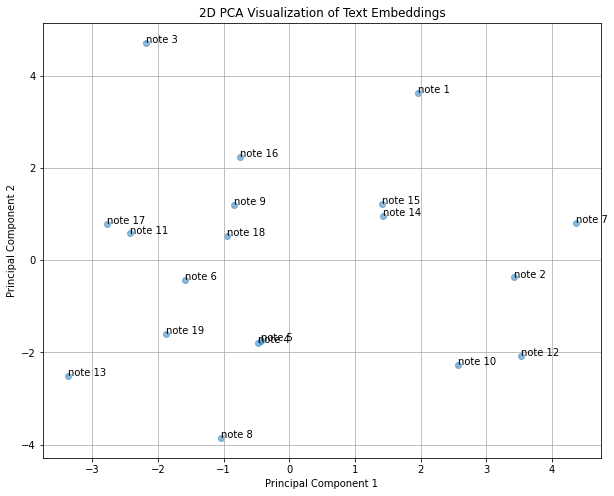

In [3]:
vectors_list = df['vectors'].tolist()

# Perform PCA on vectors
pca = PCA(n_components=2)
vectors_pca = pca.fit_transform(vectors_list)

# Add PCA components to DataFrame
df['PCA1'] = vectors_pca[:, 0]
df['PCA2'] = vectors_pca[:, 1]

# Generate labels for the plot
df['label'] = ['note {}'.format(i+1) for i in range(len(df))]

# Plotting
plt.figure(figsize=(10, 8))
plt.scatter(df['PCA1'], df['PCA2'], alpha=0.5)

# Annotate points with labels
for i, label in enumerate(df['label']):
    plt.annotate(label, (df['PCA1'].iloc[i], df['PCA2'].iloc[i]))

plt.title('2D PCA Visualization of Text Embeddings')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

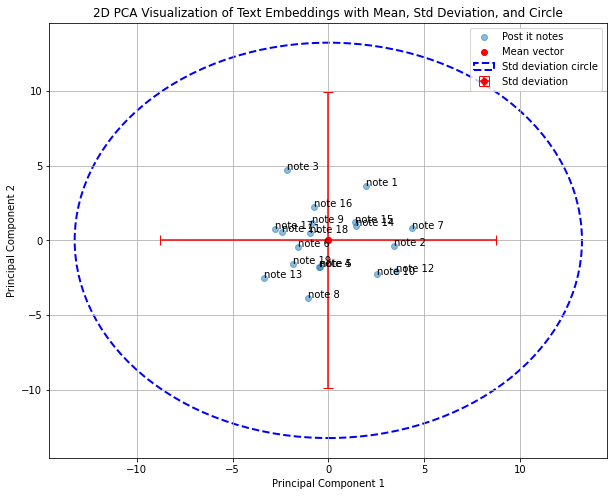

In [4]:
# Calculate mean and standard deviation of embeddings
embeddings_matrix = np.array(vectors_list)
mean_vector = np.mean(embeddings_matrix, axis=0)
std_vector = np.std(embeddings_matrix, axis=0)

# Perform PCA on mean and standard deviation vectors
mean_pca = pca.transform([mean_vector])[0]
std_pca = pca.transform([std_vector])[0]

# Calculate the radius for the circle (use norm of std_pca to get a single radius value)
radius = np.linalg.norm(std_pca)

# Plotting
plt.figure(figsize=(10, 8))
plt.scatter(df['PCA1'], df['PCA2'], alpha=0.5, label='Post it notes')
for i, label in enumerate(df['label']):
    plt.annotate(label, (df['PCA1'].iloc[i], df['PCA2'].iloc[i]))

plt.scatter(mean_pca[0], mean_pca[1], color='red', label='Mean vector')
plt.errorbar(mean_pca[0], mean_pca[1], xerr=std_pca[0], yerr=std_pca[1], color='red', fmt='o', capsize=5, label='Std deviation')

circle = plt.Circle((mean_pca[0], mean_pca[1]), radius, color='blue', fill=False, linestyle='--', linewidth=2, label='Std deviation circle')
plt.gca().add_patch(circle)

plt.title('2D PCA Visualization of Text Embeddings with Mean, Std Deviation, and Circle')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

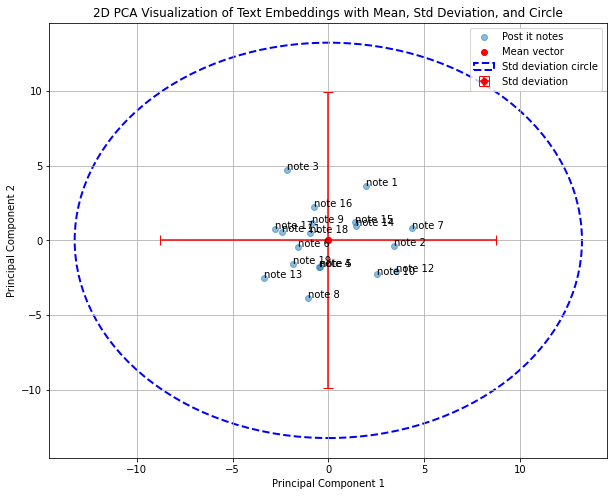

      label  nearest_prior_distance
0    note 1                0.000000
1    note 2                4.260364
2    note 3                4.269066
3    note 4                4.148829
4    note 5                0.063583
5    note 6                1.757872
6    note 7                1.502657
7    note 8                2.141682
8    note 9                1.780447
9   note 10                2.081377
10  note 11                1.305937
11  note 12                0.982745
12  note 13                2.678801
13  note 14                2.270377
14  note 15                0.250727
15  note 16                1.042616
16  note 17                0.406300
17  note 18                0.680333
18  note 19                1.207375


In [5]:
distances = cdist(vectors_pca, vectors_pca)

# Find nearest prior point distance for each point
nearest_prior_distances = []
for i in range(1, len(distances)):
    prior_distances = distances[i, :i]
    nearest_prior_distances.append(np.min(prior_distances))

# Add nearest prior distances to DataFrame
df['nearest_prior_distance'] = [0] + nearest_prior_distances 
plt.figure(figsize=(10, 8))
plt.scatter(df['PCA1'], df['PCA2'], alpha=0.5, label='Post it notes')

# Annotate points with labels
for i, label in enumerate(df['label']):
    plt.annotate(label, (df['PCA1'].iloc[i], df['PCA2'].iloc[i]))
plt.scatter(mean_pca[0], mean_pca[1], color='red', label='Mean vector')
plt.errorbar(mean_pca[0], mean_pca[1], xerr=std_pca[0], yerr=std_pca[1], color='red', fmt='o', capsize=5, label='Std deviation')

circle = plt.Circle((mean_pca[0], mean_pca[1]), radius, color='blue', fill=False, linestyle='--', linewidth=2, label='Std deviation circle')
plt.gca().add_patch(circle)

plt.title('2D PCA Visualization of Text Embeddings with Mean, Std Deviation, and Circle')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

# Print the DataFrame with nearest prior distances
print(df[['label', 'nearest_prior_distance']])

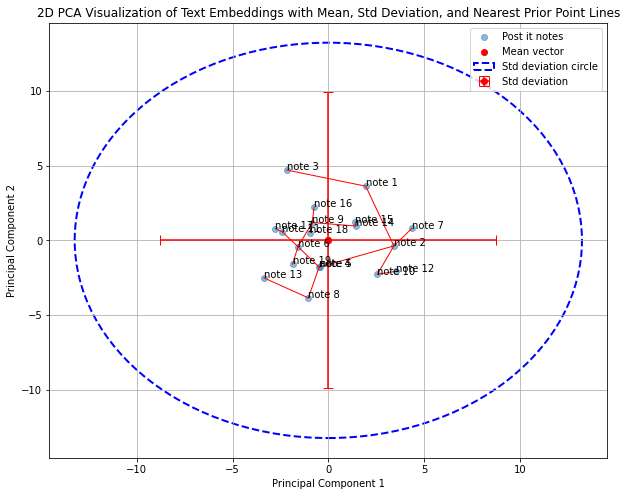

      label  nearest_prior_distance
0    note 1                0.000000
1    note 2                4.260364
2    note 3                4.269066
3    note 4                4.148829
4    note 5                0.063583
5    note 6                1.757872
6    note 7                1.502657
7    note 8                2.141682
8    note 9                1.780447
9   note 10                2.081377
10  note 11                1.305937
11  note 12                0.982745
12  note 13                2.678801
13  note 14                2.270377
14  note 15                0.250727
15  note 16                1.042616
16  note 17                0.406300
17  note 18                0.680333
18  note 19                1.207375


In [6]:
distances = cdist(vectors_pca, vectors_pca)

nearest_prior_indices = []
nearest_prior_distances = []
for i in range(1, len(distances)):
    prior_distances = distances[i, :i]
    nearest_prior_idx = np.argmin(prior_distances)
    nearest_prior_indices.append(nearest_prior_idx)
    nearest_prior_distances.append(np.min(prior_distances))

df['nearest_prior_distance'] = [0] + nearest_prior_distances

plt.figure(figsize=(10, 8))
plt.scatter(df['PCA1'], df['PCA2'], alpha=0.5, label='Post it notes')

for i, label in enumerate(df['label']):
    plt.annotate(label, (df['PCA1'].iloc[i], df['PCA2'].iloc[i]))

plt.scatter(mean_pca[0], mean_pca[1], color='red', label='Mean vector')
plt.errorbar(mean_pca[0], mean_pca[1], xerr=std_pca[0], yerr=std_pca[1], color='red', fmt='o', capsize=5, label='Std deviation')

circle = plt.Circle((mean_pca[0], mean_pca[1]), radius, color='blue', fill=False, linestyle='--', linewidth=2, label='Std deviation circle')
plt.gca().add_patch(circle)

for i, prior_idx in enumerate(nearest_prior_indices, start=1):
    plt.plot(
        [df['PCA1'].iloc[i], df['PCA1'].iloc[prior_idx]], 
        [df['PCA2'].iloc[i], df['PCA2'].iloc[prior_idx]], 
        'r-', 
        linewidth=1
    )

plt.title('2D PCA Visualization of Text Embeddings with Mean, Std Deviation, and Nearest Prior Point Lines')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

print(df[['label', 'nearest_prior_distance']])

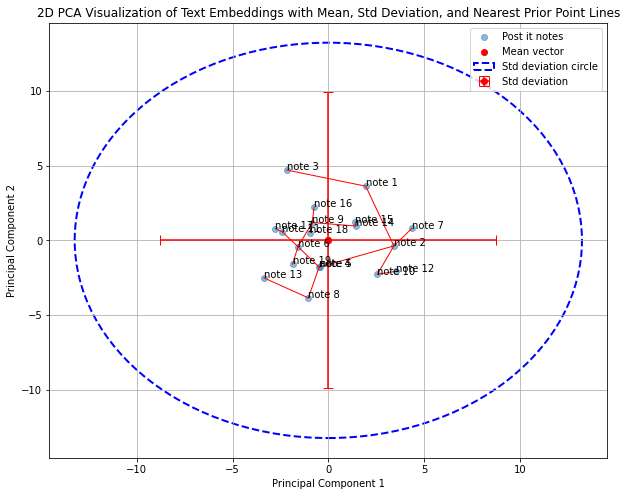

In [7]:
distances = cdist(vectors_pca, vectors_pca)

# Find nearest prior point distance for each point and plot lines
nearest_prior_distances = []
for i in range(1, len(distances)):
    prior_distances = distances[i, :i]
    nearest_prior_distances.append(np.min(prior_distances))

# Add nearest prior distances to DataFrame
df['nearest_prior_distance'] = [0] + nearest_prior_distances  # First point has no prior point

# Plotting PCA scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(df['PCA1'], df['PCA2'], alpha=0.5, label='Post it notes')

# Annotate points with labels
for i, label in enumerate(df['label']):
    plt.annotate(label, (df['PCA1'].iloc[i], df['PCA2'].iloc[i]))

plt.scatter(mean_pca[0], mean_pca[1], color='red', label='Mean vector')
plt.errorbar(mean_pca[0], mean_pca[1], xerr=std_pca[0], yerr=std_pca[1], color='red', fmt='o', capsize=5, label='Std deviation')

circle = plt.Circle((mean_pca[0], mean_pca[1]), radius, color='blue', fill=False, linestyle='--', linewidth=2, label='Std deviation circle')
plt.gca().add_patch(circle)

for i in range(1, len(df)):
    prior_idx = np.argmin(distances[i, :i])
    plt.plot(
        [df['PCA1'].iloc[i], df['PCA1'].iloc[prior_idx]], 
        [df['PCA2'].iloc[i], df['PCA2'].iloc[prior_idx]], 
        'r-', 
        linewidth=1
    )

plt.title('2D PCA Visualization of Text Embeddings with Mean, Std Deviation, and Nearest Prior Point Lines')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

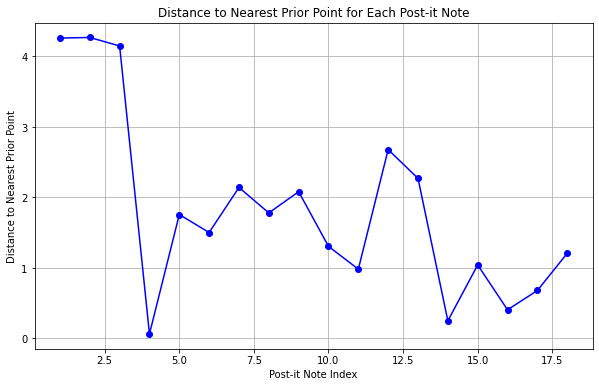

      label  nearest_prior_distance
0    note 1                0.000000
1    note 2                4.260364
2    note 3                4.269066
3    note 4                4.148829
4    note 5                0.063583
5    note 6                1.757872
6    note 7                1.502657
7    note 8                2.141682
8    note 9                1.780447
9   note 10                2.081377
10  note 11                1.305937
11  note 12                0.982745
12  note 13                2.678801
13  note 14                2.270377
14  note 15                0.250727
15  note 16                1.042616
16  note 17                0.406300
17  note 18                0.680333
18  note 19                1.207375


In [8]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(df)), nearest_prior_distances, marker='o', linestyle='-', color='b')
plt.title('Distance to Nearest Prior Point for Each Post-it Note')
plt.xlabel('Post-it Note Index')
plt.ylabel('Distance to Nearest Prior Point')
plt.grid(True)
plt.show()

print(df[['label', 'nearest_prior_distance']])

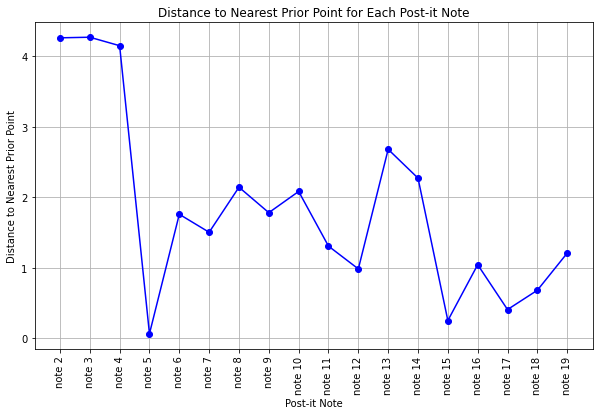

      label  nearest_prior_distance
0    note 1                0.000000
1    note 2                4.260364
2    note 3                4.269066
3    note 4                4.148829
4    note 5                0.063583
5    note 6                1.757872
6    note 7                1.502657
7    note 8                2.141682
8    note 9                1.780447
9   note 10                2.081377
10  note 11                1.305937
11  note 12                0.982745
12  note 13                2.678801
13  note 14                2.270377
14  note 15                0.250727
15  note 16                1.042616
16  note 17                0.406300
17  note 18                0.680333
18  note 19                1.207375


In [9]:
plt.figure(figsize=(10, 6))
plt.plot(df['label'][1:], nearest_prior_distances, marker='o', linestyle='-', color='b')
plt.xticks(rotation=90)
plt.title('Distance to Nearest Prior Point for Each Post-it Note')
plt.xlabel('Post-it Note')
plt.ylabel('Distance to Nearest Prior Point')
plt.grid(True)
plt.show()

print(df[['label', 'nearest_prior_distance']])

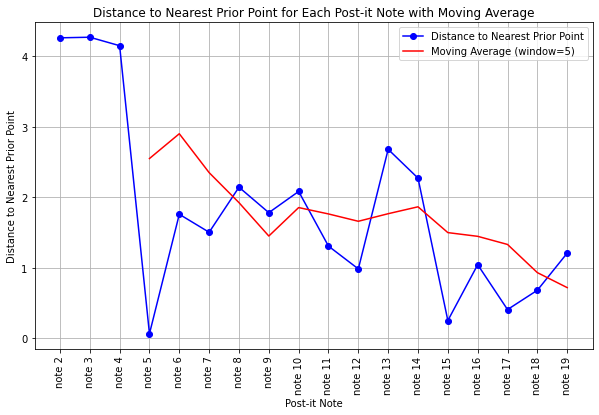

      label  nearest_prior_distance  moving_average
0    note 1                0.000000             NaN
1    note 2                4.260364             NaN
2    note 3                4.269066             NaN
3    note 4                4.148829             NaN
4    note 5                0.063583        2.548368
5    note 6                1.757872        2.899943
6    note 7                1.502657        2.348401
7    note 8                2.141682        1.922925
8    note 9                1.780447        1.449248
9   note 10                2.081377        1.852807
10  note 11                1.305937        1.762420
11  note 12                0.982745        1.658438
12  note 13                2.678801        1.765861
13  note 14                2.270377        1.863847
14  note 15                0.250727        1.497717
15  note 16                1.042616        1.445053
16  note 17                0.406300        1.329764
17  note 18                0.680333        0.930071
18  note 19 

In [10]:
window_size = 5 
df['moving_average'] = df['nearest_prior_distance'].rolling(window=window_size).mean()

plt.figure(figsize=(10, 6))
plt.plot(df['label'][1:], nearest_prior_distances, marker='o', linestyle='-', color='b', label='Distance to Nearest Prior Point')
plt.plot(df['label'][1:], df['moving_average'][1:], linestyle='-', color='r', label='Moving Average (window={})'.format(window_size))
plt.xticks(rotation=90)
plt.title('Distance to Nearest Prior Point for Each Post-it Note with Moving Average')
plt.xlabel('Post-it Note')
plt.ylabel('Distance to Nearest Prior Point')
plt.legend()
plt.grid(True)
plt.show()

# Print the DataFrame with nearest prior distances and moving average
print(df[['label', 'nearest_prior_distance', 'moving_average']])

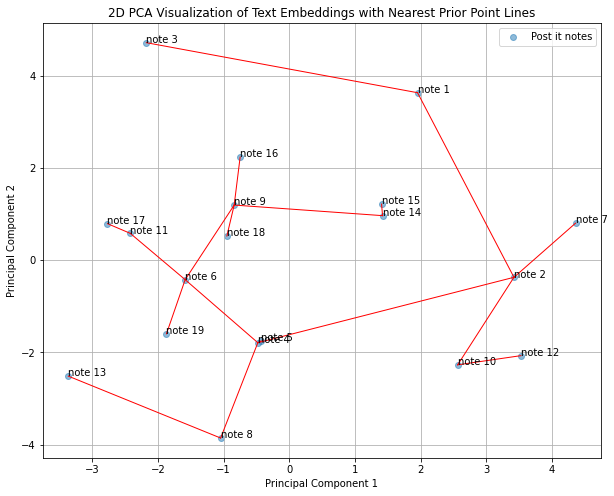

      label  nearest_prior_distance
0    note 1                0.000000
1    note 2                4.260364
2    note 3                4.269066
3    note 4                4.148829
4    note 5                0.063583
5    note 6                1.757872
6    note 7                1.502657
7    note 8                2.141682
8    note 9                1.780447
9   note 10                2.081377
10  note 11                1.305937
11  note 12                0.982745
12  note 13                2.678801
13  note 14                2.270377
14  note 15                0.250727
15  note 16                1.042616
16  note 17                0.406300
17  note 18                0.680333
18  note 19                1.207375


In [11]:
distances = cdist(vectors_pca, vectors_pca)

nearest_prior_indices = []
nearest_prior_distances = []
for i in range(1, len(distances)):
    prior_distances = distances[i, :i]
    nearest_prior_idx = np.argmin(prior_distances)
    nearest_prior_indices.append(nearest_prior_idx)
    nearest_prior_distances.append(np.min(prior_distances))

df['nearest_prior_distance'] = [0] + nearest_prior_distances  # First point has no prior point

plt.figure(figsize=(10, 8))
plt.scatter(df['PCA1'], df['PCA2'], alpha=0.5, label='Post it notes')

for i, label in enumerate(df['label']):
    plt.annotate(label, (df['PCA1'].iloc[i], df['PCA2'].iloc[i]))

# Draw red lines between each post-it note and its nearest prior point
for i in range(1, len(df)):
    prior_idx = np.argmin(distances[i, :i])
    plt.plot(
        [df['PCA1'].iloc[i], df['PCA1'].iloc[prior_idx]], 
        [df['PCA2'].iloc[i], df['PCA2'].iloc[prior_idx]], 
        'r-', 
        linewidth=1
    )

plt.title('2D PCA Visualization of Text Embeddings with Nearest Prior Point Lines')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

# Print the DataFrame with nearest prior distances
print(df[['label', 'nearest_prior_distance']])

In [12]:
output_file_path = 'output_embeddings.csv'
df['embedding_vector'] = df['vectors'].apply(lambda x: ','.join(map(str, x)))
df.to_csv(output_file_path, index=False, columns=['label', 'ideas', 'embedding_vector', 'PCA1', 'PCA2', 'nearest_prior_distance'])

              label  nearest_prior_distance
0    Post it note 1                0.000000
1    Post it note 2                4.260364
2    Post it note 3                4.269066
3    Post it note 4                4.148829
4    Post it note 5                0.063583
5    Post it note 6                1.757872
6    Post it note 7                1.502657
7    Post it note 8                2.141682
8    Post it note 9                1.780447
9   Post it note 10                2.081377
10  Post it note 11                1.305937
11  Post it note 12                0.982745
12  Post it note 13                2.678801
13  Post it note 14                2.270377
14  Post it note 15                0.250727
15  Post it note 16                1.042616
16  Post it note 17                0.406300
17  Post it note 18                0.680333
18  Post it note 19                1.207375


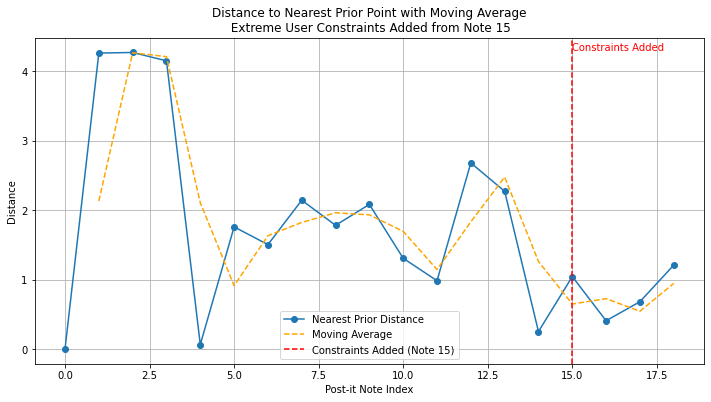

In [36]:
print(df[['label', 'nearest_prior_distance']])

# Plotting distance to nearest prior point with moving average
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['nearest_prior_distance'], marker='o', label='Nearest Prior Distance')

# Calculate moving average
window_size = 2  # Modify as needed
df['moving_avg'] = df['nearest_prior_distance'].rolling(window=window_size).mean()
plt.plot(df.index, df['moving_avg'], linestyle='--', color='orange', label='Moving Average')

# Add vertical line to indicate where constraints are added
plt.axvline(x=15, color='red', linestyle='--', label='Constraints Added (Note 15)')
plt.text(15, max(df['nearest_prior_distance']), 'Constraints Added', color='red', verticalalignment='bottom')

plt.title('Distance to Nearest Prior Point with Moving Average\n Extreme User Constraints Added from Note 15')
plt.xlabel('Post-it Note Index')
plt.ylabel('Distance')
plt.legend()
plt.grid(True)
plt.show()